In [11]:
import pandas as pd
import numpy as np 
from pycaret.classification import *

train = pd.read_csv('data2/train.csv')
test = pd.read_csv('data2/test.csv')
submission = pd.read_csv('data2/gender_submission.csv')

In [8]:
print(train.shape)
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,3489
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8056,0.0000,0.6986,0.7848,0.7343,0.5823,0.5891,0.0052
1,Linear Discriminant Analysis,0.8056,0.8495,0.6986,0.7848,0.7343,0.5823,0.5891,0.0046
2,CatBoost Classifier,0.8055,0.8606,0.6900,0.7867,0.7313,0.5802,0.5867,1.2385
3,Logistic Regression,0.8040,0.8515,0.7112,0.7707,0.7362,0.5810,0.5854,0.0282
4,Light Gradient Boosting Machine,0.7959,0.8632,0.7025,0.7550,0.7235,0.5628,0.5677,0.4023
5,Gradient Boosting Classifier,0.7944,0.8544,0.6774,0.7685,0.7174,0.5568,0.5617,0.0713
6,Extreme Gradient Boosting,0.7912,0.8474,0.7319,0.7351,0.7300,0.5603,0.5638,0.0861
7,Ada Boost Classifier,0.7751,0.8228,0.6944,0.7216,0.7038,0.5233,0.5272,0.0610
8,Random Forest Classifier,0.7734,0.8198,0.6272,0.7445,0.6757,0.5048,0.5128,0.0214
9,Extra Trees Classifier,0.7703,0.8073,0.6859,0.7097,0.6954,0.5114,0.5138,0.1077


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3489,
                solver='auto', tol=0.001)

In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8056,0.0000,0.6986,0.7848,0.7343,0.5823,0.5891,0.0033
1,Linear Discriminant Analysis,0.8056,0.8495,0.6986,0.7848,0.7343,0.5823,0.5891,0.0040
2,CatBoost Classifier,0.8055,0.8606,0.6900,0.7867,0.7313,0.5802,0.5867,1.2285
3,Logistic Regression,0.8040,0.8515,0.7112,0.7707,0.7362,0.5810,0.5854,0.0272
4,Light Gradient Boosting Machine,0.7959,0.8632,0.7025,0.7550,0.7235,0.5628,0.5677,0.4018
5,Gradient Boosting Classifier,0.7944,0.8544,0.6774,0.7685,0.7174,0.5568,0.5617,0.0731
6,Extreme Gradient Boosting,0.7912,0.8474,0.7319,0.7351,0.7300,0.5603,0.5638,0.0852
7,Ada Boost Classifier,0.7751,0.8228,0.6944,0.7216,0.7038,0.5233,0.5272,0.0600
8,Random Forest Classifier,0.7734,0.8198,0.6272,0.7445,0.6757,0.5048,0.5128,0.0213
9,Extra Trees Classifier,0.7703,0.8073,0.6859,0.7097,0.6954,0.5114,0.5138,0.1157


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3489,
                solver='auto', tol=0.001)

In [25]:
create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8739,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.8571,0.9209,0.7500,0.8571,0.8000,0.6897,0.6934
2,0.8254,0.8568,0.8333,0.7407,0.7843,0.6385,0.6416
3,0.7258,0.8261,0.6087,0.6364,0.6222,0.4072,0.4074
4,0.8871,0.9298,0.7917,0.9048,0.8444,0.7565,0.7606
5,0.6774,0.7851,0.5417,0.5909,0.5652,0.3096,0.3103
6,0.8065,0.9041,0.7500,0.7500,0.7500,0.5921,0.5921
7,0.7742,0.8679,0.5417,0.8125,0.6500,0.4930,0.5151
8,0.7742,0.7971,0.6250,0.7500,0.6818,0.5090,0.5141
9,0.7903,0.8706,0.8333,0.6897,0.7547,0.5744,0.5823


In [28]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.0000,0.7083,0.8095,0.7556,0.6207,0.6240
1,0.8889,0.0000,0.7500,0.9474,0.8372,0.7546,0.7665
2,0.8254,0.0000,0.7917,0.7600,0.7755,0.6328,0.6331
3,0.7258,0.0000,0.6522,0.6250,0.6383,0.4177,0.4179
4,0.8710,0.0000,0.7083,0.9444,0.8095,0.7149,0.7319
5,0.8065,0.0000,0.7917,0.7308,0.7600,0.5983,0.5996
6,0.8387,0.0000,0.7500,0.8182,0.7826,0.6548,0.6564
7,0.8065,0.0000,0.5833,0.8750,0.7000,0.5654,0.5908
8,0.7258,0.0000,0.5417,0.6842,0.6047,0.3991,0.4055
9,0.7419,0.0000,0.7083,0.6538,0.6800,0.4644,0.4654


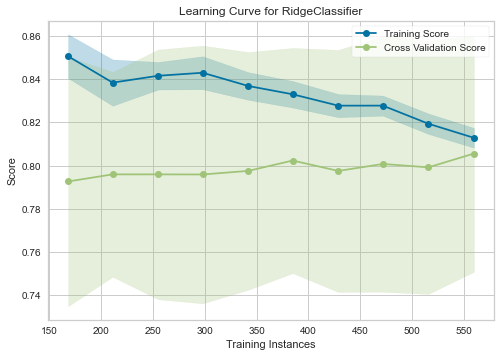

In [30]:
plot_model(estimator = ridge, plot = 'learning')

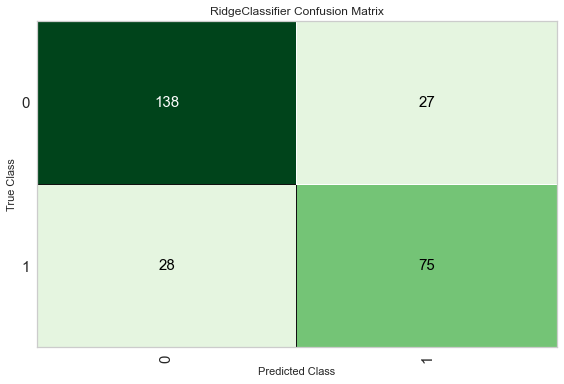

In [32]:
plot_model(estimator = ridge, plot = 'confusion_matrix')

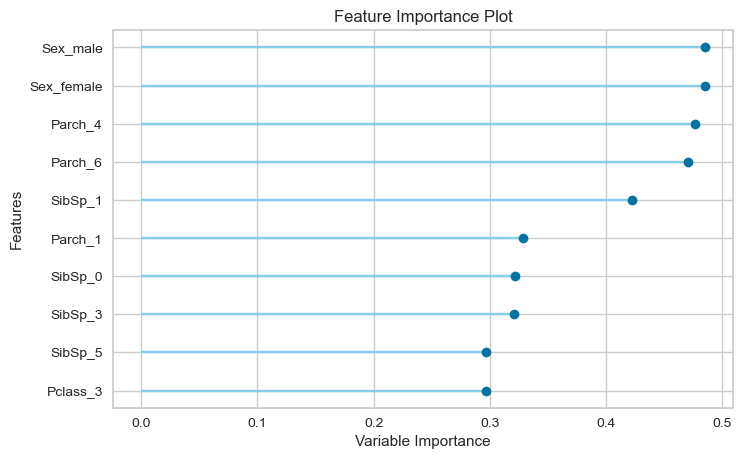

In [33]:
plot_model(estimator = ridge, plot = 'feature')

In [34]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
predict_model(ridge, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [41]:
predictions = predict_model(ridge, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [43]:
submission['Survived'] = predictions['Label']
submission.to_csv('submission.csv',index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
